# Simple Neuron

In [26]:
import numpy as  np

def sigmoid (x):
    return 1/ (1+np.exp(-x))

class Neurons:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self,inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
    
weights = np.array([0, 1])
bias = 4
n = Neurons(weights, bias)

x = np.array([2, 3])
print(n.feedforward(x))

0.9990889488055994


## Basic Neural Network
---
Utilizing ForwardFeed

In [27]:
class OurNeuralNetwork:
    
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        
        self.h1 = Neurons(weights, bias)
        self.h2 = Neurons(weights, bias)
        self.o1 = Neurons(weights, bias)
        
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        
        return out_o1
    
network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))

0.7216325609518421


## Mean Squared error (MSE) loss:

In [28]:
import numpy as np

def mse_loss(y_true, y_pred):
    return ((y_true - y_pred)**2).mean()

y_true = np.array([1,0,0,1])
y_pred = np.array([0,0,0,0])

mse_loss(y_true,y_pred)

np.float64(0.5)

## Simple Neural Network with Layers and Neurons
---
```
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
```
  ***DISCLAIMER***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code utilizes libraries like TensorFlow and Pytorch.
  

In [ ]:
import numpy as np
import pandas as pd

dfLoss = []
dfepoch = []

def sigmoid(x):
    return 1/ (1 + np.exp(-x))

def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

def mse_loss(y_true, y_pred):
    return ((y_true - y_pred)**2).mean()

class NeuralNetwork:
    
    def __init__(self):
       # Weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
       
       # Bias 
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()
    
    def feedforward(self, x):
        h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1
    
    def train(self, data, all_y_trues):
        global dfLoss
        global dfepoch
        
        learn_rate = 0.1
        epochs = 5000
    
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = sigmoid(sum_h1)
                
                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = sigmoid(sum_h2)
                
                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1
                
                # Partial L / Partial w1
                d_l_d_ypred = -2 * (y_true - y_pred)
                
                # Neuron o1
                d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)
                
                d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)
                
                # Neurons h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
                d_h1_d_b1 = deriv_sigmoid(sum_h1)
                
                # Neurons h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h1)
                d_h2_d_w4 = x[0] * deriv_sigmoid(sum_h1)
                d_h2_d_b2 = deriv_sigmoid(sum_h2)
                
                # --- Update Weights and biases
                # Neurons h1
                self.w1 -= learn_rate * d_l_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_l_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b3 -= learn_rate * d_l_d_ypred * d_ypred_d_h1 * d_h1_d_b1
                
                # Neuron h2
                self.w3 -= learn_rate * d_l_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_l_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b3 -= learn_rate * d_l_d_ypred * d_ypred_d_h2 * d_h2_d_b2
                
                # Neuron o1
                self.w5 -= learn_rate * d_l_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_l_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_l_d_ypred * d_ypred_d_b3
                
                # --- Calculate total loss at the end of each epoch
                if epoch % 10 == 0:
                    y_preds = np.apply_along_axis(self.feedforward, 1, data)
                    loss = mse_loss(all_y_trues, y_preds)
                    print("Epoch %d loss: %.3f" % (epoch, loss))
                    dfLoss.append(loss)
                    dfepoch.append(epoch)
                
    def fetch():
        return dfLoss, dfepoch
                
data = np.array([
    [-2, -1 ], # Alice
    [25, 6 ], # Bob
    [17, 4 ], # Charlie
    [-15, -6 ], # Diana
    [-21, -2 ], # Rose
    [30 , 10 ], # Josh
    [12 , 12], # Nick
    [13, 4], # James
    [-1 , 1] # Katie
])

all_y_trues = np.array([
    1, # Alice
    0, # Bob
    0, # Charlie
    1, # Diana
    1, # Rose
    0, # Josh
    0, # Nick
    0, # James
    1, # Katie
])

network = NeuralNetwork()
network.train(data, all_y_trues)

# Graph Plotting

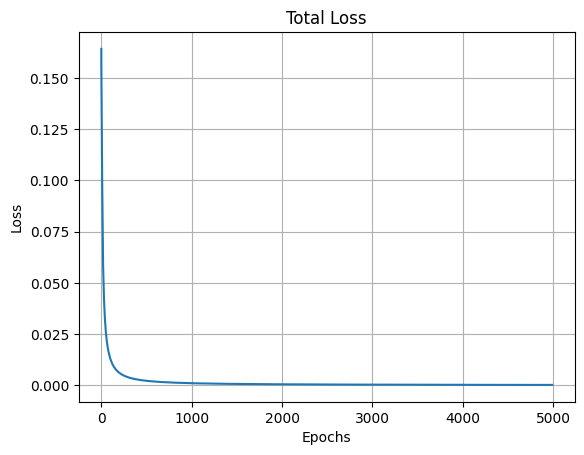

In [52]:
import matplotlib.pyplot as plt
import pandas as pd 

dfLoss, dfepoch = NeuralNetwork.fetch()

class plot:
    def plot(dfLoss,dfepoch):
        df = pd.DataFrame(dfLoss,dfepoch)
        
        plt.plot(df)
        plt.title("Total Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.grid()
        plt.show()
        
        
plot.plot(dfLoss,dfepoch)

# Test Predictions

In [30]:
emily = np.array([-7, -3])
frank = np.array([20, 2])
print("Emily: %.3f" % network.feedforward(emily))
print("Frank: %.3f" % network.feedforward(frank))


Emily: 0.689
Frank: 0.585


# Dynamic Prediction

In [9]:
name = input("Enter the Name: ")
kgweightVal = int(input("Enter the Weight (KG):"))
heightVal  = float(input("Enter the Height (Eg. 6.2)"))

pdWeightVal = 2.204623 * kgweightVal
icHeightVal = 12 * heightVal

trueWeightVal = pdWeightVal - 135
trueHeightVal = icHeightVal - 66

indexName = np.array([trueWeightVal, trueHeightVal])
predVal = network.feedforward(indexName)

if predVal > 0.5:
    print(f"{name} :: Female -> Prediction:" "%.3f" % predVal)
else:
    print(f"{name} :: Male -> Prediction:" "%.3f" % predVal)

Harsh :: Male -> Prediction:0.016
